In [17]:
from scipy.io import loadmat
data = loadmat('/home/hnaxiong/ser/exe4/dataset3.mat')
keys = data.keys()
keys

dict_keys(['__header__', '__version__', '__globals__', 'theta_vk_i', 'r_i_vk_i', 't', 'w_vk_vk_i', 'v_vk_vk_i', 'rho_i_pj_i', 'y_k_j', 'C_c_v', 'rho_v_c_v', 'w_var', 'v_var', 'y_var', 'fu', 'fv', 'cu', 'cv', 'b'])

In [76]:
fu = data['fu'].item()
fv = data['fv'].item()
cu = data['cu'].item()
cv = data['cv'].item()
b = data['b'].item()
Pj_i_true = data['rho_i_pj_i']
measurement = data['y_k_j']
measurement[0,90,18]


-1.0

In [19]:
import numpy as np
#define stereo camera projection matrix
M = np.array([[fu, 0, cu, 0],
     [0, fv, cv, 0],
     [fu, 0, cu, -fu*b],
     [0, fv, cu, 0]])
# convert 3D point into 2d stereo point pair
def Cam_Projection(pt):
    x = pt[0]
    y = pt[1]
    z = pt[2]
    pt = np.array([[x],[y],[z],[1]])
    pt_2d = np.dot(M / z , pt)
    return pt_2d

# convert ground truth point into stereo point pairs
Pj_in_cam = []
for i in range(20):
    pt = [Pj_i_true[0,i],Pj_i_true[1,i],Pj_i_true[2,i]]
    pt_2d = Cam_Projection(pt)
    Pj_in_cam.append(pt_2d)


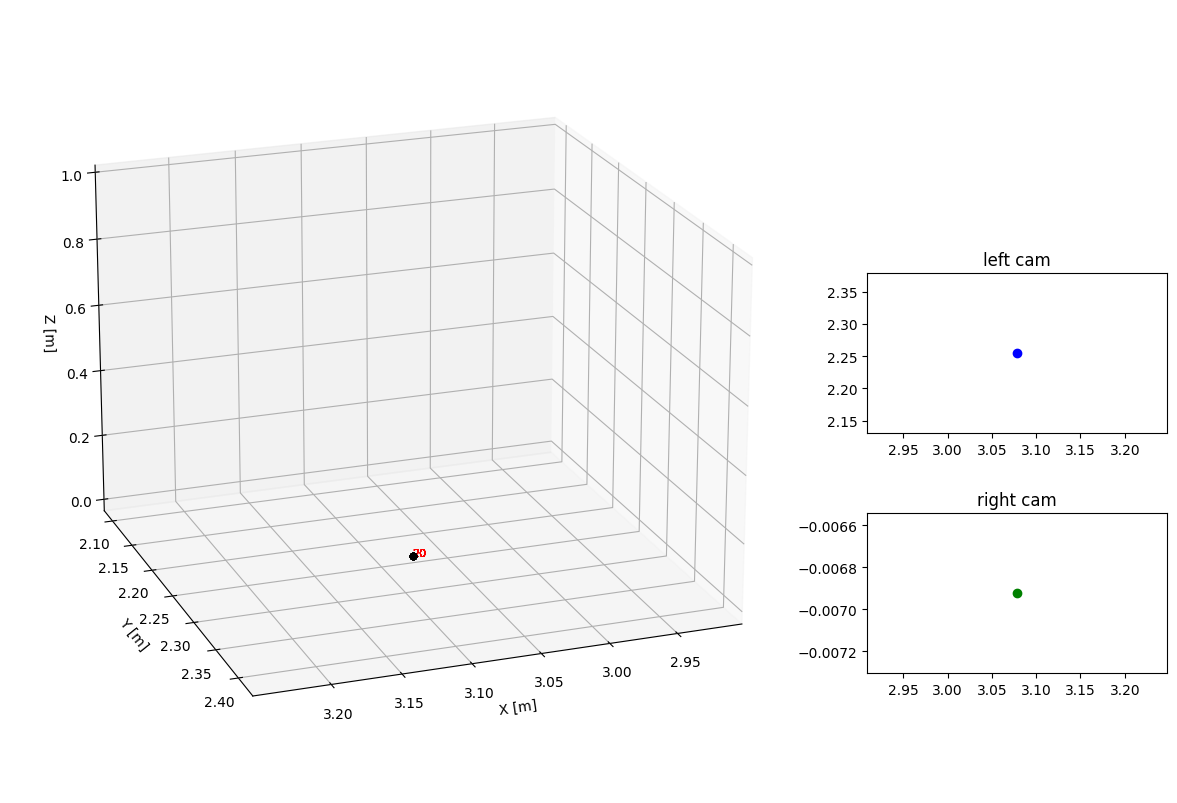

In [95]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.animation import FuncAnimation

# for i in range(measurement.shape[1]):

# ul = [0, i]
# vl = [1, i]
# ur = [2, i]
# vr = [3, i]

fig = plt.figure(figsize=(15, 8))
ax_3d = fig.add_subplot(121, projection='3d')
ax_3d.set_xlabel('X [m]')
ax_3d.set_ylabel('Y [m]')
ax_3d.set_zlabel('Z [m]')
ax_3d.view_init(elev=20, azim=70)
for j in range(20):
    pt = [Pj_i_true[0,i],Pj_i_true[1,i],Pj_i_true[2,i]]
    x = Pj_i_true[0,i]
    y = Pj_i_true[1,i]
    z = Pj_i_true[2,i]
    ax_3d.scatter(x, y, z, c='black', marker='o')  
    ax_3d.text(x, y, z, f'{i+1}', color='red', fontsize=8)  
ax_3d.text(0,0,0, 'time:', color='red', fontsize=8)  
ax_3d.axis('equal')
ax_3d.set_zlim(-0.015,1) 

ax_left = fig.add_subplot(222)
ax_left.scatter(x, y, c='blue')
ax_left.set_title('left cam')

ax_right = fig.add_subplot(224)
ax_right.scatter(x, z, c='green')
ax_right.set_title('right cam')



plt.subplots_adjust(wspace=0.5)
ax_3d.set_position([0,0,0.98,0.98])
ax_left.set_position([0.8, 0.45, 0.2, 0.2])  # [left, bottom, width, height]
ax_right.set_position([0.8, 0.15, 0.2, 0.2])  # [left, bottom, width, height]

plt.show()


In [96]:
Pj_i_true

array([[ 1.6162364 ,  1.49900226,  1.50405785,  2.06928873,  2.03108909,
         1.88943646,  2.00388904,  2.14626541,  2.24885309,  2.39682629,
         2.62792568,  2.9255497 ,  3.13092932,  2.74578527,  2.44750391,
         2.71627847,  2.37941413,  2.70311282,  3.22033852,  3.07833181],
       [ 2.11272672,  2.63254202,  3.19782555,  3.17089615,  2.86780494,
         2.54492856,  2.05592624,  2.33471317,  2.65488914,  2.8632287 ,
         3.06172995,  2.94221165,  2.68821616,  2.68692081,  2.44955069,
         2.40894739,  2.20137134,  2.0130821 ,  2.0379734 ,  2.25481112],
       [-0.00738089, -0.00890945, -0.01024971, -0.01066521, -0.01045486,
        -0.01046194, -0.01030111, -0.01042452, -0.00991525, -0.01077923,
        -0.00403525, -0.00835303, -0.00807754, -0.00840465, -0.00942125,
        -0.00625649, -0.00761348, -0.00937463, -0.00863483, -0.00692204]])

In [105]:
measurement.shape[1]
Pj_i_true[0]

array([1.6162364 , 1.49900226, 1.50405785, 2.06928873, 2.03108909,
       1.88943646, 2.00388904, 2.14626541, 2.24885309, 2.39682629,
       2.62792568, 2.9255497 , 3.13092932, 2.74578527, 2.44750391,
       2.71627847, 2.37941413, 2.70311282, 3.22033852, 3.07833181])

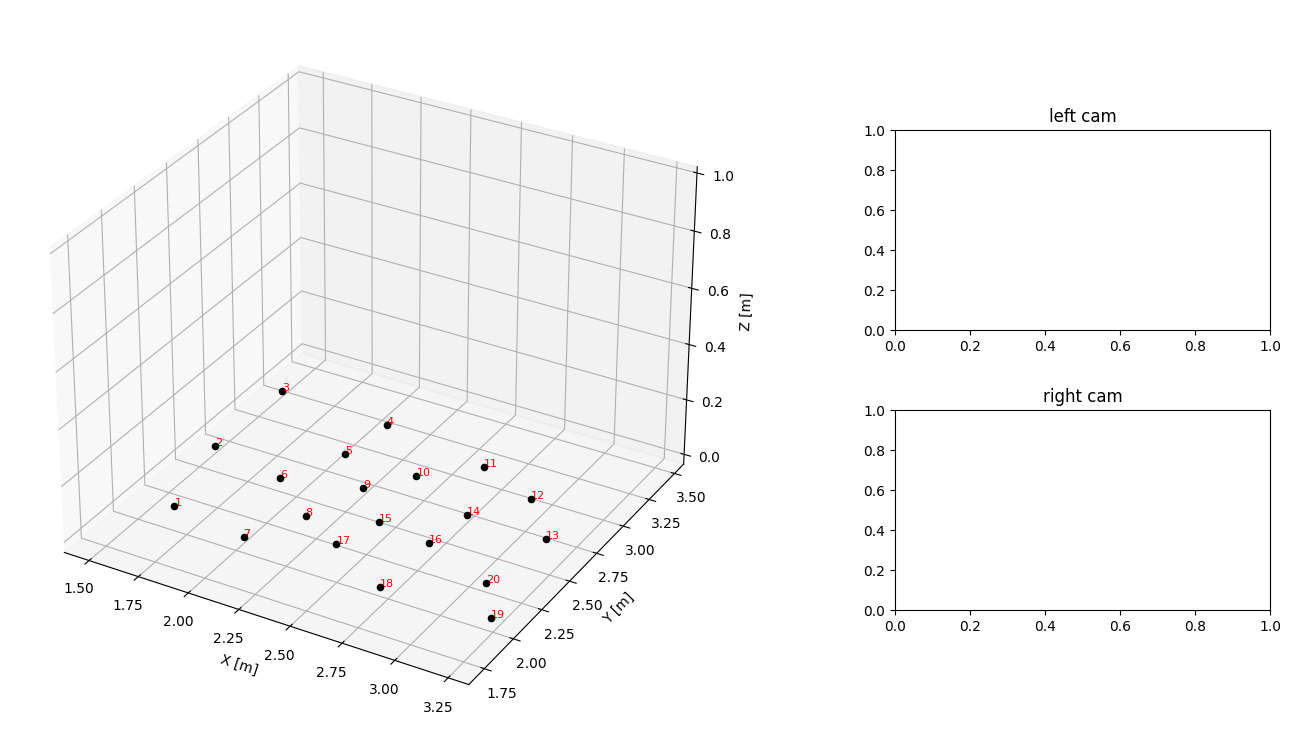

In [103]:
import matplotlib.pyplot as plt

# plot init
fig = plt.figure(figsize=(15, 8))
ax_3d = fig.add_subplot(121, projection='3d')
ax_left = fig.add_subplot(222)
ax_right = fig.add_subplot(224)
def init():
    ax_3d.set_xlabel('X [m]')
    ax_3d.set_ylabel('Y [m]')
    ax_3d.set_zlabel('Z [m]')
    for i in range(20):
        x = Pj_i_true[0,i]
        y = Pj_i_true[1,i]
        z = Pj_i_true[2,i]
        ax_3d.scatter(x, y, z, c='black', marker='o')  
        ax_3d.text(x, y, z, f'{i+1}', color='red', fontsize=8)  
    ax_3d.text(0,0,0, 'time:', color='red', fontsize=8)  
    ax_3d.axis('equal')
    ax_3d.set_zlim(-0.015,1) 
    plt.subplots_adjust(wspace=2)
    ax_3d.set_position([0,0,0.9,0.9])
    ax_left.set_position([0.8, 0.5, 0.25, 0.25])  # [left, bottom, width, height]
    ax_right.set_position([0.8, 0.15, 0.25, 0.25])  # [left, bottom, width, height]
    ax_left.set_title('left cam')
    ax_right.set_title('right cam')

# update
def update(frame):
    ul = [0, frame]
    vl = [1, frame]
    ur = [2, frame]
    vr = [3, frame]
    for j in range(20):
        ul_j = ul[j]
        vl_j = vl[j]
        ur_j = ur[j]
        vr_j = vr[j]
        if ul_j != -1:
            ax_left.scatter(ul_j, vl_j, c='red')
        if ur_j != -1:
            ax_right.scatter(ur_j, vr_j, c='blue')

ani = FuncAnimation(fig, update, frames=len(measurement.shape[1]), init_func=init, blit=False)

ani.save('/home/hnaxiong/ser/exe4/animation.mp4', writer='ffmpeg', fps=5)

